In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt as eks
import ImageView as imv
%matplotlib inline


def seamless(fra, til):

    im_from=imageio.imread(fra)
    im_to=imageio.imread(til)

    im_from=im_from.astype(float)/255
    im_to=im_to.astype(float)/255
    xy0=(700,50)        #hvor det skal klones inn 
    xy1=(350,500)       #området hvor det hentes fra
    xlen=200            #størrelsen på klonen
    ylen=500            #

    #utvalg
    im_ed=np.zeros((xlen, ylen))
    im_ed=im_from[xy1[0]:xy1[0]+xlen, xy1[1]:xy1[1]+ylen] #henter ut delen av bildet
                                                          #som skal klones
    plt.figure()
    plt.imshow(im_ed)
    alpha=.25
    laplace1 = (im_ed[0:-2, 1:-1] +
               im_ed[2:, 1:-1] +
               im_ed[1:-1, 0:-2] +
               im_ed[1:-1, 2:] -
               4 * im_ed[1:-1, 1:-1])

    for i in range(1000):
        laplace2 = (im_ed[0:-2, 1:-1] +
                   im_ed[2:, 1:-1] +
                   im_ed[1:-1, 0:-2] +
                   im_ed[1:-1, 2:] -
                   4 * im_ed[1:-1, 1:-1])
        im_ed[1:-1, 1:-1]+=alpha*(laplace2-laplace1)
    
        im_ed[ :,  0] = im_to[xy0[0]:xy0[0]+xlen, xy0[1]]      # dirichlet randbetingelser
        im_ed[ :, -1] = im_to[xy0[0]:xy0[0]+xlen, xy0[1]+ylen]
        im_ed[ 0,  :] = im_to[xy0[0],      xy0[1]:xy0[1]+ylen]
        im_ed[-1,  :] = im_to[xy0[0]+xlen, xy0[1]:xy0[1]+ylen]

    im_ed[im_ed<0]=0 #klipper til lovlige verdier
    im_ed[im_ed>1]=1
    im_to[xy0[0]:xy0[0]+xlen, xy0[1]:xy0[1]+ylen] = im_ed
    plt.figure()
    plt.imshow(im_to)


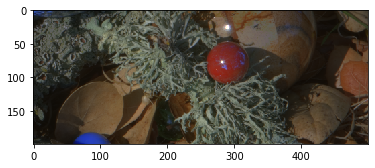

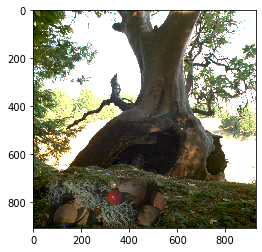

In [2]:
im1='../hdr-bilder/Balls/Balls_00016.png' #from
im2='../hdr-bilder/Tree/Tree_00064.png'   #to
seamless(im1, im2)